# lab 3

## Author : Nijatullah Mansoor
## Date : 8/13/2021
# K-Means Clustering

Demonstrate K means clustering for wines data. Dataset can be downloaded from kaggle/UCI or sklearn. The code should demonstrate the following-

1. Elbow method for choosing optimum number of clusters
2. Class to cluster comparison(visualization)
3. Silhouette analysis 
4. Impact of data scaling on the result


In [282]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

Let's get the data from sklearn library.

In [283]:
wine_df = pd.read_csv('Wine.csv',header=None)

In [284]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's name the columns names. please refer to here to see all the details about the datast. <a href='https://archive.ics.uci.edu/ml/datasets/Wine'>UCI</a>

In [285]:
wine_df.columns = [  'class'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

In [286]:
wine_df.head()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [287]:
wine_df['class'].unique()

array([1, 2, 3], dtype=int64)

In [288]:
wine_df.groupby('class')['class'].count()

class
1    59
2    71
3    48
Name: class, dtype: int64

please refer to <a href='https://github.com/nijatullahmansoor/IBM-Data-Science-Professional-Certificate/blob/master/Machine%20learning%20With%20python/MSC/labs/wine%20descriptions.names'>here for dataset description</a>

Let's check for null values.

In [289]:
wine_df.isnull().sum()

class                  0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [290]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                178 non-null    int64  
 1   alcohol              178 non-null    float64
 2   malicAcid            178 non-null    float64
 3   ash                  178 non-null    float64
 4   ashalcalinity        178 non-null    float64
 5   magnesium            178 non-null    int64  
 6   totalPhenols         178 non-null    float64
 7   flavanoids           178 non-null    float64
 8   nonFlavanoidPhenols  178 non-null    float64
 9   proanthocyanins      178 non-null    float64
 10  colorIntensity       178 non-null    float64
 11  hue                  178 non-null    float64
 12  od280_od315          178 non-null    float64
 13  proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Let's apply the describe() method.

In [291]:
wine_df.describe()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


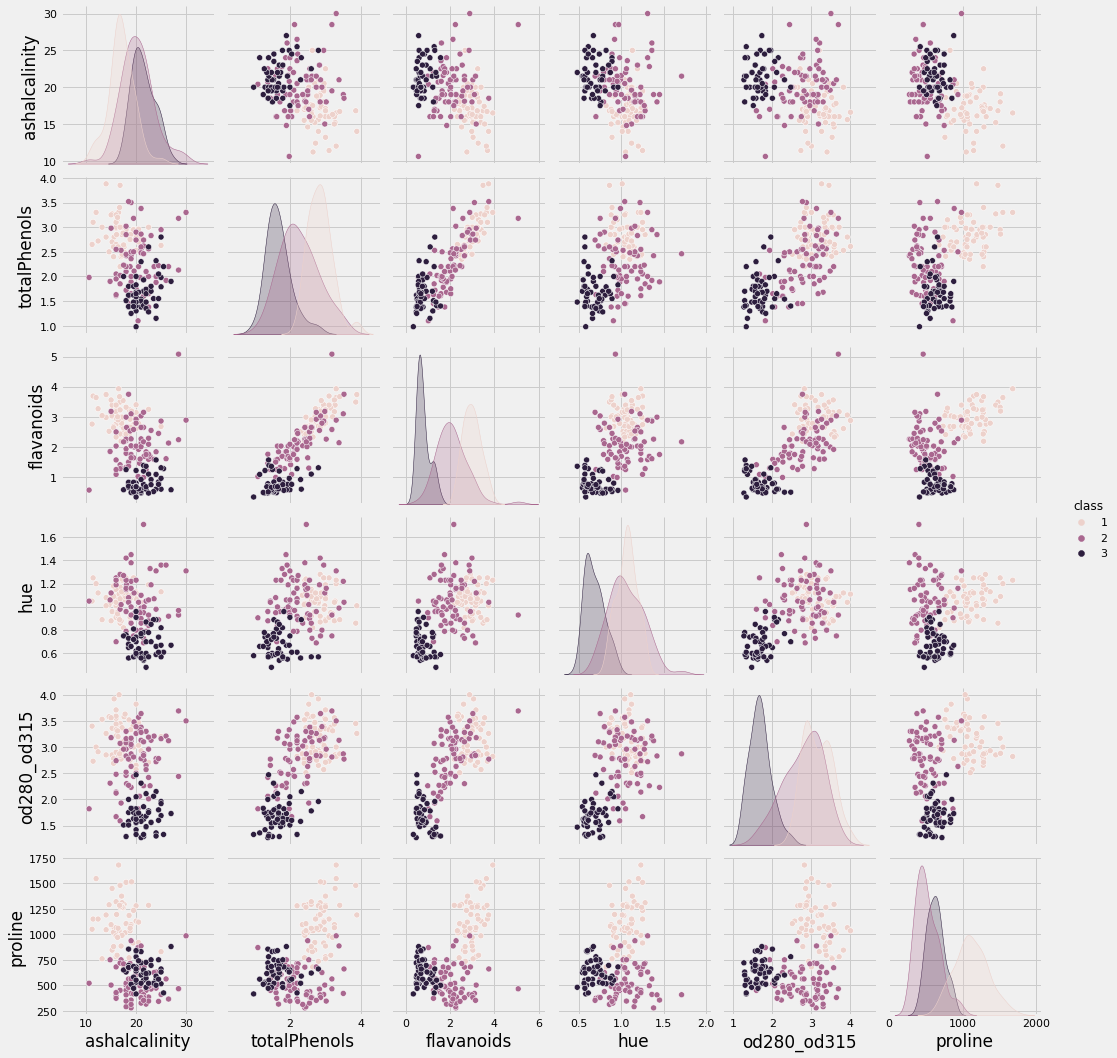

In [292]:
sns.pairplot(wine_df, vars = ['ashalcalinity', 'totalPhenols', 'flavanoids', 'hue', 'od280_od315', 'proline'] ,hue='class')
plt.show()

Let's Remove the target and try to estimate the same with the clustering techniques

In [293]:
# Removing the target
data= wine_df.iloc[:,1:]  # all the rows and columns except first column

In [294]:
data.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h2 id="pre_processing">Pre-processing</h2

As we can see that we don't have any non numarical data we are good to go ahead. if we have any catagorical data we need to convert that to numerical data. Because k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. 

# Impact of data scaling on the result

Text(0.5, 1.0, 'Visualization of raw data')

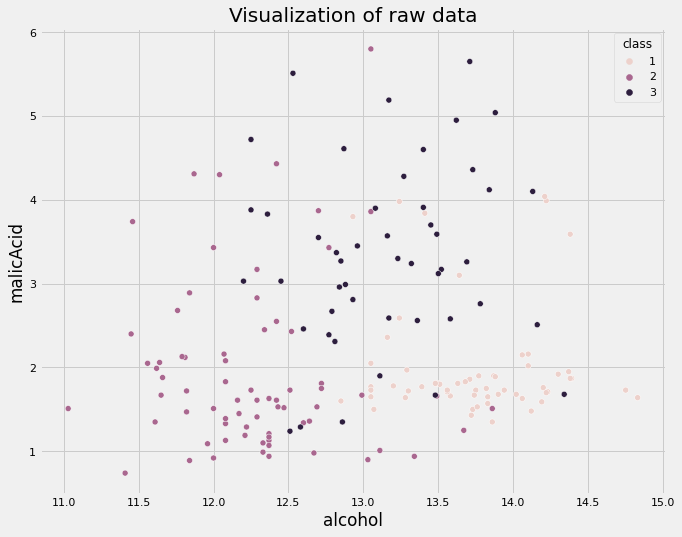

In [295]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.iloc[:,0], data.iloc[:,1],hue=wine_df['class'],cmap='gist_rainbow')
plt.title('Visualization of raw data')

 Let’s standardize the data first and run the kmeans algorithm on the standardized data with K=3.

#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
sc= StandardScaler()
data_scaled= sc.fit_transform(data)

In [298]:
data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [299]:
data1 = pd.DataFrame(columns=data.columns,data=data_scaled)
data1.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Now let's fit the KMeans model with the  with normaliztion <b> data </b>.

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 3 (since we have 3 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [301]:
k_means1 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means2 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [302]:
k_means1.fit(data)

KMeans(n_clusters=3, n_init=12)

In [303]:
k_means_labels_data = k_means1.labels_+1
k_means_labels_data

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [332]:
k_means_cluster_centers1 = k_means1.cluster_centers_
k_means_cluster_centers1

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03]])

Text(0.5, 1.0, 'Visualization of clustered data without Scaling')

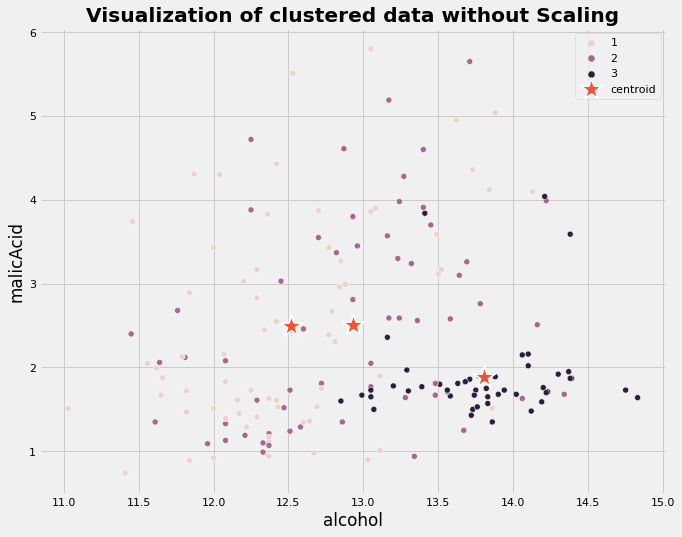

In [334]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.iloc[:,0], data.iloc[:,1],hue=k_means_labels_data,cmap='gist_rainbow')
sns.scatterplot(k_means_cluster_centers1[:,0],k_means_cluster_centers1[:,1],marker='*', s=500,label='centroid')
plt.title('Visualization of clustered data without Scaling', fontweight='bold')

In [309]:
print(f'silhouette score for raw data with (n=3):{silhouette_score(data,k_means_labels_data)}')

silhouette score for raw data with (n=3):0.571138193786884


Now let's check the impact of Normalized data.

In [310]:
k_means2.fit(data1)

KMeans(n_clusters=3, n_init=12)

Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels .

In [311]:
k_means_labels_data1 = k_means2.labels_+1
k_means_labels_data1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.

In [330]:
k_means_cluster_centers2 = k_means2.cluster_centers_
k_means_cluster_centers2

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

Text(0.5, 1.0, 'Visualization of clustered data')

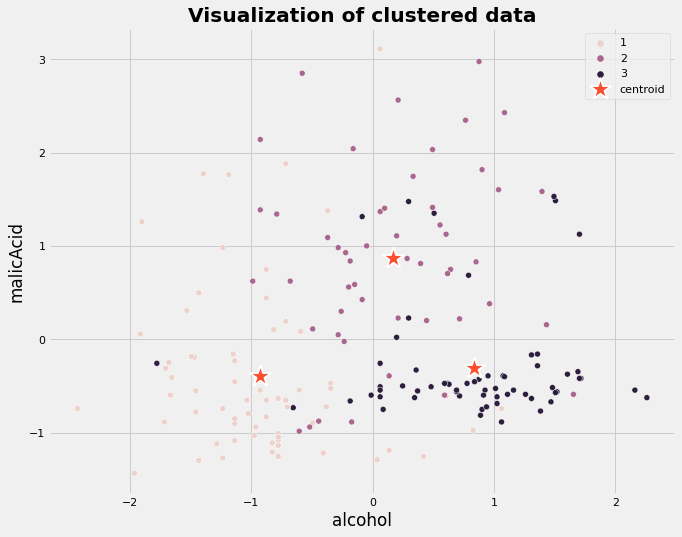

In [331]:
plt.figure(figsize=(10,8))
sns.scatterplot(data1.iloc[:,0], data1.iloc[:,1],hue=k_means_labels_data1,cmap='gist_rainbow')
sns.scatterplot(k_means_cluster_centers2[:,0],k_means_cluster_centers2[:,1],marker='*', s=500,label='centroid')
plt.title('Visualization of clustered data', fontweight='bold')



In [315]:
print(f'silhouette score for normalized data with (n=3):{silhouette_score(data1,k_means_labels_data1)}')

silhouette score for normalized data with (n=3):0.2848589191898987


## silhouette Analysis

Let's calculate the silhouette score

original data.

In [318]:
print(f'silhouette score(n=3):{silhouette_score(data,k_means_labels_data)}')

silhouette score(n=3):0.571138193786884


Now let's calculate for clusterd data. 

In [319]:
print(f'silhouette score for normalized data with (n=3):{silhouette_score(data1,k_means_labels_data1)}')

silhouette score for normalized data with (n=3):0.2848589191898987


From the above graph we can see the importance fo data Normaliztion.

In [271]:
data3 = data1[['alcohol', 'malicAcid', 'ash', 'ashalcalinity', 'magnesium',
       'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
       'colorIntensity', 'hue', 'od280_od315', 'proline']]

Text(0.5, 1.0, 'Predicted')

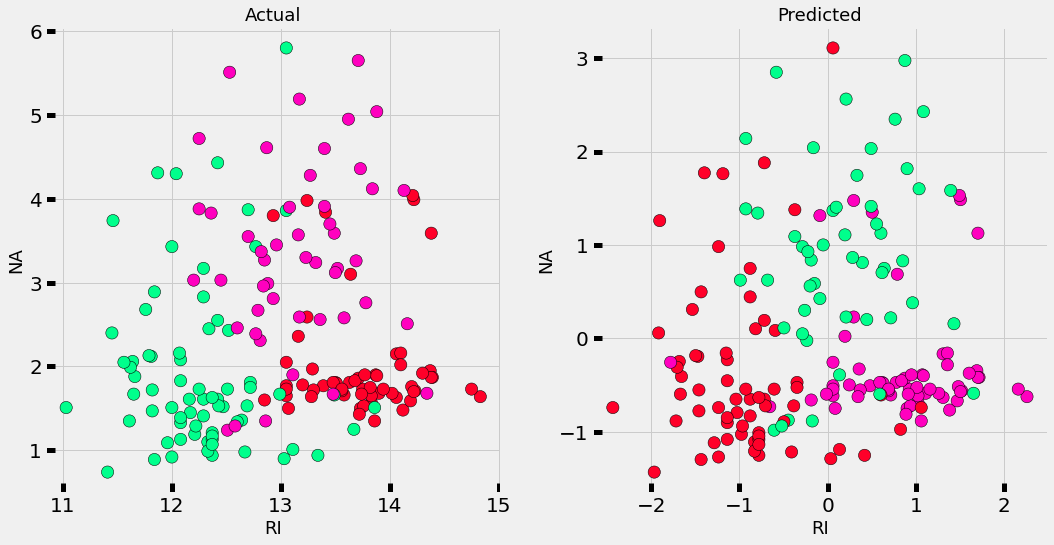

In [320]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=wine_df['class'], cmap='gist_rainbow',edgecolor='k', s=150)


axes[1].scatter(data1.iloc[:, 0], data1.iloc[:, 1], c=k_means_labels_data1, cmap='gist_rainbow',edgecolor='k', s=150)


axes[0].set_xlabel('RI', fontsize=18)
axes[0].set_ylabel('NA', fontsize=18)
axes[1].set_xlabel('RI', fontsize=18)
axes[1].set_ylabel('NA', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Elbow method for choosing optimum number of clusters

In [321]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data1)
    distortions.append(kmeanModel.inertia_)

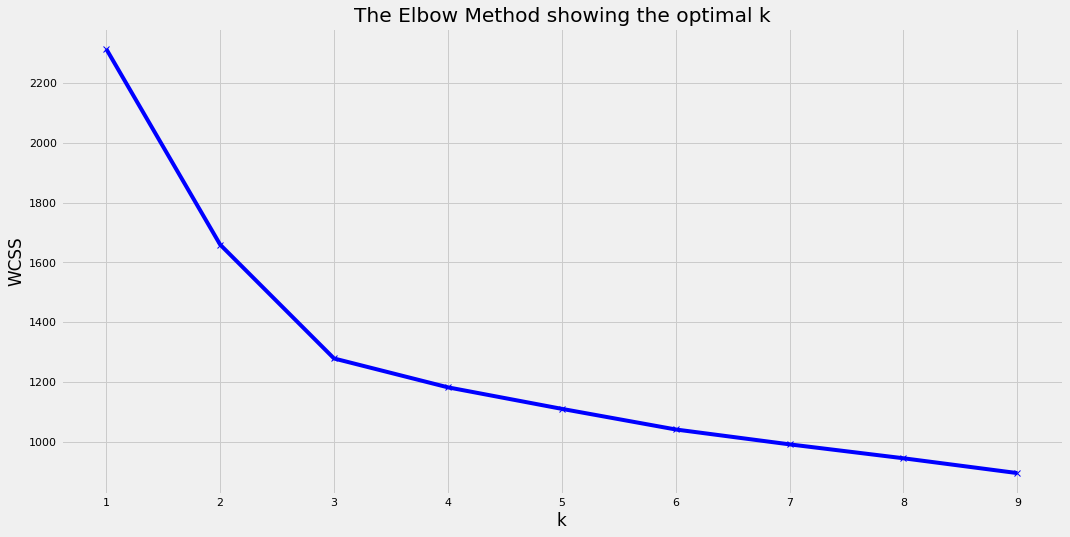

In [322]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimum value for k = 3.

#### Optimal Cluster point is 3